In [49]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

from shapely import affinity
from shapely.geometry.multipolygon import MultiPolygon
from scipy.spatial import Voronoi

In [50]:
lccs_resolution = 300 #m
areapergrid = (300/1000) ** 2 ## km2

weight_wind = [
    0.057, #landuse
    0.044, #slope
    0.088, #elevation
    0.071, #d to settlement
    0.044, #d to wetland
    0.055, #d to forest
    0.044, #prox to road
    0.088, #prox to sub
    0.261, #Resource quality
    0.247 #Farm Required area
    ]
print('weight_wind = ',sum(weight_wind))

weight_solar = [
    0.140, #landuse
    0.126, #slope
    0.063, #elevation
    0.057, #d to settlement
    0.0495, #d to wetland
    0.0275, #d to forest
    0.047, #prox to road
    0.099, #prox to sub
    0.254, #Resource quality
    0.135 #Farm Required area
    ]
print('weight_solar = ' , sum(weight_solar))


weight_biomass = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.000,
    0.027, #prox to road
    0.013, #prox to sub
    0.000,
    0.064 #Area feedstock
    ]
print('weight_biomass = ',sum(weight_biomass))

weight_bgec = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.000,
    0.027, #prox to road
    0.013, #prox to sub
    0.000,
    0.064 #Area feedstock
    ]
print('weight_bgec = ',sum(weight_bgec))

weight_bgww = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.000,
    0.027, #prox to road
    0.013, #prox to sub
    0.000,
    0.064 #Area feedstock
    ]
print('weight_bgww = ',sum(weight_bgww))

weight_msw = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.000,
    0.027, #prox to road
    0.013, #prox to sub
    0.000,
    0.064 #Area feedstock
    ]
print('weight_msw = ',sum(weight_msw))

weight_iew = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.000,
    0.027, #prox to road
    0.013, #prox to sub
    0.000,
    0.064 #Area feedstock
    ]
print('weight_iew = ',sum(weight_iew))

print('areapergrid = ',areapergrid)

weight_wind =  0.999
weight_solar =  0.998
weight_biomass =  1.0000000000000002
weight_bgec =  1.0000000000000002
weight_bgww =  1.0000000000000002
weight_msw =  1.0000000000000002
weight_iew =  1.0000000000000002
areapergrid =  0.09


In [51]:
## Create teh final SI map template ###
xr_final_SI = xr.open_dataset('Output\\xr_SI_Landcover.nc')
# xr_final_SI = xr_final_SI.drop_vars('lccs_class')
# xr_final_SI = xr_final_SI.drop_vars('SI_BGEC')
# xr_final_SI = xr_final_SI.drop_vars('SI_Biomass')
# xr_final_SI = xr_final_SI.drop_vars('SI_BGWW')
# xr_final_SI = xr_final_SI.drop_vars('SI_MSW')
# xr_final_SI = xr_final_SI.drop_vars('SI_IEW')

xr_final_SI['AVA_Wind'] = xr_final_SI['SI_Wind']
xr_final_SI['AVA_Solar'] = xr_final_SI['SI_Solar']
xr_final_SI['AVA_Biomass'] = xr_final_SI['SI_Biomass']
xr_final_SI['AVA_BGEC'] = xr_final_SI['SI_BGEC']
xr_final_SI['AVA_BGWW'] = xr_final_SI['SI_BGWW']
xr_final_SI['AVA_MSW'] = xr_final_SI['SI_MSW']
xr_final_SI['AVA_IEW'] = xr_final_SI['SI_IEW']

xr_final_SI['SI_Wind'] = 0.0
xr_final_SI['SI_Solar'] = 0.0
xr_final_SI['SI_Biomass'] = 0.0
xr_final_SI['SI_BGEC'] = 0.0
xr_final_SI['SI_BGWW'] = 0.0
xr_final_SI['SI_MSW'] = 0.0
xr_final_SI['SI_IEW'] = 0.0

xr_final_SI['AVA_Wind'] = 0
xr_final_SI['AVA_Solar'] = 0
xr_final_SI['AVA_Biomass'] = 0
xr_final_SI['AVA_BGEC'] = 0
xr_final_SI['AVA_BGWW'] = 0
xr_final_SI['AVA_MSW'] = 0
xr_final_SI['AVA_IEW'] = 0

print(xr_final_SI)
check_weight_wind = 0
check_weight_solar = 0
check_weight_biomass = 0
check_weight_bgec = 0
check_weight_bgww = 0
check_weight_msw = 0
check_weight_iew = 0


<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      float64 0.0
    SI_Biomass   float64 0.0
    SI_Solar     float64 0.0
    SI_Wind      float64 0.0
    SI_BGWW      float64 0.0
    ...           ...
    AVA_Solar    int32 0
    AVA_Biomass  int32 0
    AVA_BGEC     int32 0
    AVA_BGWW     int32 0
    AVA_MSW      int32 0
    AVA_IEW      int32 0


<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

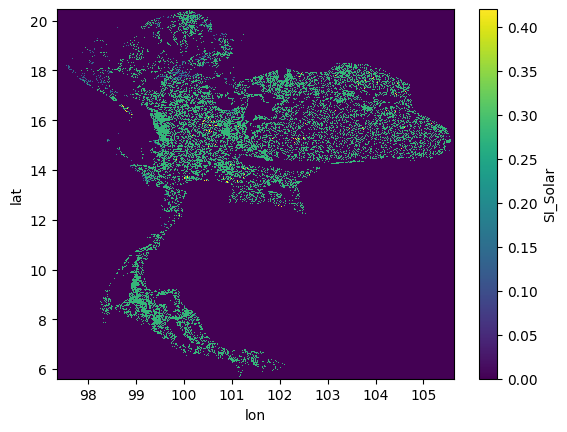

In [52]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_landuse_suitability_index['SI_Wind'] * weight_wind[0])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_landuse_suitability_index['SI_Solar'] * weight_solar[0])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_landuse_suitability_index['SI_Biomass'] * weight_biomass[0])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_landuse_suitability_index['SI_BGEC'] * weight_bgec[0])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_landuse_suitability_index['SI_BGWW'] * weight_bgww[0])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_landuse_suitability_index['SI_MSW'] * weight_msw[0])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_landuse_suitability_index['SI_IEW'] * weight_iew[0])

xr_final_SI['AVA_Wind'] = xr.where(xr_landuse_suitability_index['SI_Wind'] > 0 ,0.09,0)
xr_final_SI['AVA_Solar'] = xr.where(xr_landuse_suitability_index['SI_Solar'] > 0 ,0.09,0)
xr_final_SI['AVA_Biomass'] = xr.where(xr_landuse_suitability_index['SI_Biomass'] > 0 ,0.09,0)
xr_final_SI['AVA_BGEC'] = xr.where(xr_landuse_suitability_index['SI_BGEC'] > 0 ,0.09,0)
xr_final_SI['AVA_BGWW'] = xr.where(xr_landuse_suitability_index['SI_BGWW'] > 0 ,0.09,0)
xr_final_SI['AVA_MSW'] = xr.where(xr_landuse_suitability_index['SI_MSW'] > 0 ,0.09,0)
xr_final_SI['AVA_IEW'] = xr.where(xr_landuse_suitability_index['SI_IEW'] > 0 ,0.09,0)

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[0]
check_weight_solar = check_weight_solar + weight_solar[0]
check_weight_biomass = check_weight_biomass + weight_biomass[0]
check_weight_bgec = check_weight_bgec + weight_bgec[0]
check_weight_bgww = check_weight_bgww + weight_bgww[0]
check_weight_msw = check_weight_msw + weight_msw[0]
check_weight_iew = check_weight_iew + weight_iew[0]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

In [53]:
xr_cal = xr.open_dataset('Output\\xr_SI_Slope.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[1])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[1])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[1])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[1])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[1])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[1])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[1])

# cutout area for slope 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where(xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where(xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[1]
check_weight_solar = check_weight_solar + weight_solar[1]
check_weight_biomass = check_weight_biomass + weight_biomass[1]
check_weight_bgec = check_weight_bgec + weight_bgec[1]
check_weight_bgww = check_weight_bgww + weight_bgww[1]
check_weight_msw = check_weight_msw + weight_msw[1]
check_weight_iew = check_weight_iew + weight_iew[1]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [54]:
xr_cal = xr.open_dataset('Output\\xr_SI_Elevation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[2])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[2])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[2])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[2])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[2])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[2])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[2])

## Cutout area for elevation 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[2]
check_weight_solar = check_weight_solar + weight_solar[2]
check_weight_biomass = check_weight_biomass + weight_biomass[2]
check_weight_bgec = check_weight_bgec + weight_bgec[2]
check_weight_bgww = check_weight_bgww + weight_bgww[2]
check_weight_msw = check_weight_msw + weight_msw[2]
check_weight_iew = check_weight_iew + weight_iew[2]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [55]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosettlementarea.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[3])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[3])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[3])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[3])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[3])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[3])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[3])

## Cutout area for elevation 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[3]
check_weight_solar = check_weight_solar + weight_solar[3]
check_weight_biomass = check_weight_biomass + weight_biomass[3]
check_weight_bgec = check_weight_bgec + weight_bgec[3]
check_weight_bgww = check_weight_bgww + weight_bgww[3]
check_weight_msw = check_weight_msw + weight_msw[3]
check_weight_iew = check_weight_iew + weight_iew[3]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [56]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetowetland.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[4])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[4])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[4])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[4])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[4])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[4])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[4])

## Cutout area for elevation 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[4]
check_weight_solar = check_weight_solar + weight_solar[4]
check_weight_biomass = check_weight_biomass + weight_biomass[4]
check_weight_bgec = check_weight_bgec + weight_bgec[4]
check_weight_bgww = check_weight_bgww + weight_bgww[4]
check_weight_msw = check_weight_msw + weight_msw[4]
check_weight_iew = check_weight_iew + weight_iew[4]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [57]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoforest.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[5])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[5])

xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[5]
check_weight_solar = check_weight_solar + weight_solar[5]
check_weight_biomass = check_weight_biomass + weight_biomass[5]
check_weight_bgec = check_weight_bgec + weight_bgec[5]
check_weight_bgww = check_weight_bgww + weight_bgww[5]
check_weight_msw = check_weight_msw + weight_msw[5]
check_weight_iew = check_weight_iew + weight_iew[5]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [58]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoroad.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[6])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[6])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[6])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[6])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[6])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[6])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[6])

## Cutout area for elevation 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[6]
check_weight_solar = check_weight_solar + weight_solar[6]
check_weight_biomass = check_weight_biomass + weight_biomass[6]
check_weight_bgec = check_weight_bgec + weight_bgec[6]
check_weight_bgww = check_weight_bgww + weight_bgww[6]
check_weight_msw = check_weight_msw + weight_msw[6]
check_weight_iew = check_weight_iew + weight_iew[6]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [59]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosubstation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[7])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[7])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight_biomass[7])
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight_bgec[7])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight_bgww[7])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight_msw[7])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight_iew[7])

## Cutout area for elevation 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
xr_final_SI['SI_Biomass'] = xr.where(xr_final_SI['AVA_Biomass'] == 0 ,0,xr_final_SI['SI_Biomass'])
xr_final_SI['SI_BGEC'] = xr.where(xr_final_SI['AVA_BGEC'] == 0 ,0,xr_final_SI['SI_BGEC'])
xr_final_SI['SI_BGWW'] = xr.where(xr_final_SI['AVA_BGWW'] == 0 ,0,xr_final_SI['SI_BGWW'])
xr_final_SI['SI_MSW'] = xr.where(xr_final_SI['AVA_MSW'] == 0 ,0,xr_final_SI['SI_MSW'])
xr_final_SI['SI_IEW'] = xr.where(xr_final_SI['AVA_IEW'] == 0 ,0,xr_final_SI['SI_IEW'])

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[7]
check_weight_solar = check_weight_solar + weight_solar[7]
check_weight_biomass = check_weight_biomass + weight_biomass[7]
check_weight_bgec = check_weight_bgec + weight_bgec[7]
check_weight_bgww = check_weight_bgww + weight_bgww[7]
check_weight_msw = check_weight_msw + weight_msw[7]
check_weight_iew = check_weight_iew + weight_iew[7]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [60]:
xr_cal = xr.open_dataset('Output\\xr_SI_resourcepotential.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[8])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[8])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar']  == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'].astype('float32')
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'].astype('float32')
xr_final_SI['AVA_Wind'] = xr_final_SI['AVA_Wind'].astype('float32')
xr_final_SI['AVA_Solar'] = xr_final_SI['AVA_Solar'].astype('float32')

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[8]
check_weight_solar = check_weight_solar + weight_solar[8]
check_weight_biomass = check_weight_biomass + weight_biomass[8]
check_weight_bgec = check_weight_bgec + weight_bgec[8]
check_weight_bgww = check_weight_bgww + weight_bgww[8]
check_weight_msw = check_weight_msw + weight_msw[8]
check_weight_iew = check_weight_iew + weight_iew[8]

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)

print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [61]:
##################### Farm Area for Wind and SOlar #########################################################################

mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

suitablearea_wind = 4 #km2
suitablearea_solar = 0.4  #km2

rolgridsuitablearea_wind = int(np.ceil(np.sqrt(suitablearea_wind/areapergrid)))
rolgridsuitablearea_solar = int(np.ceil(np.sqrt(suitablearea_solar/areapergrid)))

print('rolgridsuitablearea_wind = ',rolgridsuitablearea_wind)
print('rolgridsuitablearea_solar = ',rolgridsuitablearea_solar)

xr_final_SI['FRA_SI_Wind'] = xr_final_SI['AVA_Wind'].rolling(lon = rolgridsuitablearea_wind, lat = rolgridsuitablearea_wind, min_periods=1,center=True).sum()
xr_final_SI['FRA_SI_Solar'] = xr_final_SI['AVA_Solar'].rolling(lon = rolgridsuitablearea_solar, lat = rolgridsuitablearea_solar, min_periods=1,center=True).sum()
xr_final_SI['FRA_SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['FRA_SI_Wind'])
xr_final_SI['FRA_SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['FRA_SI_Solar'])

###### Wind ########
xr_final_SI['FRA_SI_Wind'] = xr.where( xr_final_SI['FRA_SI_Wind'] >= suitablearea_wind,3,0)
###### Solar ########
xr_final_SI['FRA_SI_Solar'] = xr.where( xr_final_SI['FRA_SI_Solar'] >= suitablearea_solar,3,0)

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_final_SI['FRA_SI_Wind'] * weight_wind[9])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_final_SI['FRA_SI_Solar'] * weight_solar[9])
check_weight_wind = check_weight_wind + weight_wind[9]
check_weight_solar = check_weight_solar + weight_solar[9]

xr_final_SI = xr_final_SI.drop_vars('FRA_SI_Wind')
xr_final_SI = xr_final_SI.drop_vars('FRA_SI_Solar')
print(xr_final_SI)

print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("check_weight_biomass = ",check_weight_biomass)
print("check_weight_bgec = ",check_weight_bgec)
print("check_weight_bgww = ",check_weight_bgww)
print("check_weight_msw = ",check_weight_msw)
print("check_weight_iew = ",check_weight_iew)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())
print('Max SI Wind = ',xr_final_SI['SI_Wind'].max())

rolgridsuitablearea_wind =  7
rolgridsuitablearea_solar =  3


<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 

In [67]:
######################## Area of feed stock for fuel-based plant #################################################
print(xr_final_SI.data_vars)

print('-----------------------First, I convert kTOE to MW--------------------------------')

heatrate_biomass = 14706
heatrate_bgec = 12326
heatrate_bgww = 12326
heatrate_msw = 12130
heatrate_iew = 12130

plantfactor_biomass = 0.8
plantfactor_bgec = 0.8
plantfactor_bgww = 0.8
plantfactor_msw = 0.8
plantfactor_iew = 0.8

Data variables:
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ADM1_EN      (lat, lon) object ...
    A_BGEC       (lat, lon) float64 ...
    A_Biomass    (lat, lon) float64 ...
    A_BGWW       (lat, lon) float64 ...
    A_MSW        (lat, lon) float64 ...
    A_IEW        (lat, lon) float64 ...
    AVA_Wind     (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0

In [46]:
xr_final_SI.to_netcdf(path='Output\\xr_final_SI.nc')

#############################################################################################################################